# Importing the Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

Using TensorFlow backend.


In [2]:
#Intialize the model
model=Sequential()

In [3]:
# Add Convolution Layer
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation="relu"))

In [4]:
#Add Pooling Layer
model.add(MaxPooling2D(pool_size = (2, 2)))

In [5]:
#Add Flattening Layer
model.add(Flatten())

In [6]:
#Add Hidden Layer
model.add(Dense(init="random_uniform",activation="relu",output_dim=120))

C:\Users\saire\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=120, kernel_initializer="random_uniform")`
  


In [7]:
#Add Output layer
model.add(Dense(init="random_uniform",activation="sigmoid",output_dim=1))

C:\Users\saire\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="random_uniform")`
  


# Data preprocessing

In [8]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
x_train = train_datagen.flow_from_directory('C:/Users/saire/Downloads/Remote Internship-2020/dataset/trainset',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                     class_mode = 'binary')
x_test = test_datagen.flow_from_directory('C:/Users/saire/Downloads/Remote Internship-2020/dataset/testset',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [10]:
print(x_train.class_indices)

{'Normal': 0, 'Pneumonia': 1}


In [11]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


# Train the model

In [12]:
model.fit_generator(x_train,
                         steps_per_epoch = 160,
                         epochs = 10,
                         validation_data = x_train,
                         validation_steps = 63)


Epoch 1/10
160/160 [==============================] - 289s 2s/step - loss: 0.3460 - acc: 0.8418 - val_loss: 0.1712 - val_acc: 0.9250
Epoch 2/10
160/160 [==============================] - 274s 2s/step - loss: 0.1474 - acc: 0.9404 - val_loss: 0.1843 - val_acc: 0.9219
Epoch 3/10
160/160 [==============================] - 783s 5s/step - loss: 0.0683 - acc: 0.9795 - val_loss: 0.0764 - val_acc: 0.9776
Epoch 4/10
160/160 [==============================] - 271s 2s/step - loss: 0.0654 - acc: 0.9793 - val_loss: 0.0326 - val_acc: 0.9922
Epoch 5/10
160/160 [==============================] - 274s 2s/step - loss: 0.0272 - acc: 0.9932 - val_loss: 0.0129 - val_acc: 0.9976
Epoch 6/10
160/160 [==============================] - 272s 2s/step - loss: 0.0125 - acc: 0.9988 - val_loss: 0.0095 - val_acc: 0.9982
Epoch 7/10
160/160 [==============================] - 272s 2s/step - loss: 0.0098 - acc: 0.9984 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 8/10
160/160 [==============================] - 215s 1s/step -

In [13]:
model.save("cnnmodel.h5")

# configuring the learning process

In [14]:
#Compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

# Test the model

In [16]:
model.fit_generator(x_test,
                         steps_per_epoch = 160,
                         epochs = 10,
                         validation_data = x_test,
                         validation_steps = 63)

Epoch 1/10
160/160 [==============================] - 221s 1s/step - loss: 0.0285 - acc: 0.9906 - val_loss: 0.0014 - val_acc: 1.0000
Epoch 2/10
160/160 [==============================] - 273s 2s/step - loss: 7.1723e-04 - acc: 1.0000 - val_loss: 3.4176e-04 - val_acc: 1.0000
Epoch 3/10
160/160 [==============================] - 211s 1s/step - loss: 2.3124e-04 - acc: 1.0000 - val_loss: 1.2380e-04 - val_acc: 1.0000
Epoch 4/10
160/160 [==============================] - 212s 1s/step - loss: 7.7019e-05 - acc: 1.0000 - val_loss: 2.3107e-05 - val_acc: 1.0000
Epoch 5/10
160/160 [==============================] - 208s 1s/step - loss: 8.9612e-06 - acc: 1.0000 - val_loss: 3.5917e-06 - val_acc: 1.0000
Epoch 6/10
160/160 [==============================] - 209s 1s/step - loss: 2.4543e-06 - acc: 1.0000 - val_loss: 1.6043e-06 - val_acc: 1.0000
Epoch 7/10
160/160 [==============================] - 209s 1s/step - loss: 1.2087e-06 - acc: 1.0000 - val_loss: 9.3584e-07 - val_acc: 1.0000
Epoch 8/10
160/160 [=

# save the model

In [25]:
model.save("cnnmodel.h5")

In [26]:
!pip install opencv-contrib-python

# predicting the model

In [27]:
from keras.models import load_model
import numpy as np
import cv2
model=load_model('cnnmodel.h5')

In [28]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [29]:
from skimage.transform import resize

def detect(frame):
    try:
        img = resize(frame,(64,64))
        img = np.expand_dims(img,axis=0)
        if(np.max(img)>1):
            img = img/255.0
        prediction = model.predict(img)
        print(prediction)
        prediction = model.predict_classes(img)
        print(prediction)
    except AttributeError:
        print("shape not found")


In [30]:
frame=cv2.imread("C:/Users/saire/Downloads/Remote Internship-2020/dataset/testset/Normal/n3.jpeg")
data = detect(frame)

[[6.14814e-05]]
[[0]]


In [31]:
from matplotlib.pyplot import *

[[1.7093484e-05]]
[[0]]


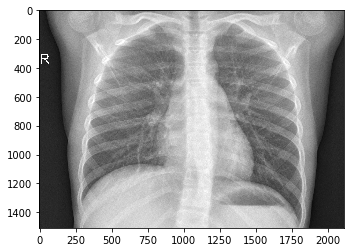

In [32]:
frame=cv2.imread(r'C:\Users\saire\Downloads\Remote Internship-2020\dataset\testset\Normal\n.jpeg')
imshow(frame)
data=detect(frame)